<a href="https://colab.research.google.com/github/erickao08/Data_Science_Python_Practice/blob/master/O'Reilly_p13n_takehome_ml_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy  as np

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1qb6HAPtj4AtSyGZbxeDTAEK5I3NKXCoT' # The shareable link

In [87]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1qb6HAPtj4AtSyGZbxeDTAEK5I3NKXCoT


In [88]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sampled_training.csv') 
! ls 
df = pd.read_csv('sampled_training.csv')
# Dataset is now stored in a Pandas Dataframe

adc.json  Filename.csv	sample_data  sampled_test.csv  sampled_training.csv


In [14]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,58811cdf,8326c04b,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,a99f214a,ce6e6bbd,2cd8ff6d,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,1ce4451d,99e427c9,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,bd7c02a1,51197d98,2203a096,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1c306e3a,ff065cf0,1,2,15706,320,50,1722,0,35,100084,79


In [0]:
#define what's the feature and what's the target

target = df['click']
features = df.drop('click',axis= 1)

features= features[features.select_dtypes(exclude='object').columns]
features.drop(['id','hour','banner_pos', 'device_type','device_conn_type'],axis= 1, inplace=True)


In [66]:
features

,C1,C14,C15,C16,C17,C18,C19,C20,C21
0,1005,20596,320,50,2161,0,35,100148,157
1,1005,18993,320,50,2161,0,35,100034,157
2,1005,21611,320,50,2480,3,297,100111,61
3,1005,4687,320,50,423,2,39,100148,32
4,1005,15706,320,50,1722,0,35,100084,79
5,1005,20596,320,50,2161,0,35,-1,157
6,1005,15701,320,50,1722,0,35,100084,79
7,1005,21611,320,50,2480,3,297,100111,61
8,1005,15702,320,50,1722,0,35,-1,79
9,1005,15708,320,50,1722,0,35,-1,79


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [0]:
lg= LogisticRegression()

In [70]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict = lg.predict(x_test)


In [72]:
# Use score method to get accuracy of model
score = lg.score(x_test, y_test)
print(score)

0.8276143325935621


In [0]:
#check the difference between the real result and the predicton(get the confusion matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predict)


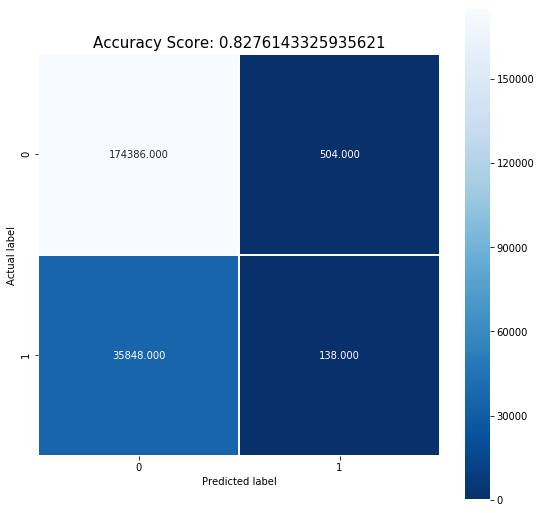

In [76]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [0]:
TP = 138
TN = 174386
FP = 504
FN = 35848


#Sensitivity (Recall) True Positive
Sensitivity = TP / TP+FP
#Specificity True Negative
Specificity = TN/ TN+FN



In [77]:
print(lg.predict_proba(x_test))

[[0.84960711 0.15039289]
 [0.79697351 0.20302649]
 [0.90038664 0.09961336]
 ...
 [0.82568223 0.17431777]
 [0.89094949 0.10905051]
 [0.80174297 0.19825703]]


In [89]:
# import test data
downloaded.GetContentFile('sampled_test.csv') 
! ls 
df_test = pd.read_csv('sampled_test.csv')

adc.json  Filename.csv	sample_data  sampled_test.csv  sampled_training.csv


In [90]:
df_test.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,58811cdf,8326c04b,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,a99f214a,ce6e6bbd,2cd8ff6d,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,1ce4451d,99e427c9,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,bd7c02a1,51197d98,2203a096,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1c306e3a,ff065cf0,1,2,15706,320,50,1722,0,35,100084,79


In [0]:
target_test = df_test['click']
features_test = df_test.drop('click',axis= 1)

features_test= features_test[features_test.select_dtypes(exclude='object').columns]
features_test.drop(['id','hour','banner_pos', 'device_type','device_conn_type'],axis= 1, inplace=True)

In [0]:
test_predict= lg.predict(features_test)

In [94]:
test_score = lg.score(features_test, target_test)
print(test_score)

0.8280359738329014


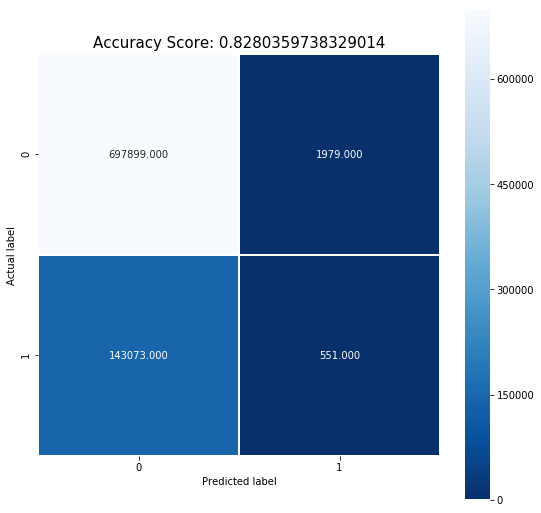

In [96]:
cm_test = metrics.confusion_matrix(target_test, test_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title, size = 15);

In [97]:
print(lg.predict_proba(features_test))

[[0.88570731 0.11429269]
 [0.87833448 0.12166552]
 [0.86091669 0.13908331]
 ...
 [0.80117706 0.19882294]
 [0.8220188  0.1779812 ]
 [0.82203812 0.17796188]]
